In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Entrenamieto_ECI_2020.csv')
df = df.dropna()
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [3]:
df = df[(df.Stage == 'Closed Lost') | (df.Stage == 'Closed Won') ]

En los siguientes analisis se elimino los casos en los que las TRF fueran 0 aunque estos se analizaran mas adelante.

In [36]:
dfoc = df.drop(df.index[df['Total_Amount_Currency'] == 'GBP'])
dfoc = dfoc.drop(dfoc.index[dfoc['Total_Amount_Currency'] == 'AUD'])
dfoc = dfoc.drop(dfoc.index[dfoc['Total_Amount_Currency'] == 'EUR'])
dfoc = dfoc.drop(dfoc.index[dfoc['Total_Amount_Currency'] == 'JPY'])
dfoc = dfoc.drop(dfoc.index[dfoc['TRF'] == 0])
dfoc['Stage'].value_counts()

Closed Lost    2233
Closed Won      861
Name: Stage, dtype: int64

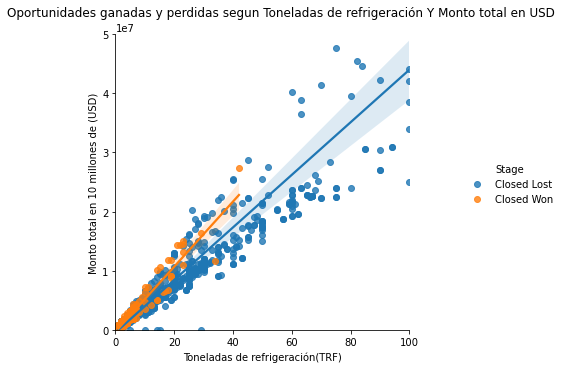

In [34]:
g = sns.lmplot(
    data=dfoc,
    x="TRF", y="Total_Amount", hue="Stage",
    height=5
)

g.set(xlim=(0, 100))
g.set(ylim=(0, 50000000))
fig = g.fig 
fig.suptitle('Oportunidades ganadas y perdidas segun Toneladas de refrigeración Y Monto total en USD',fontsize=12,va='bottom')
g.set_axis_labels("Toneladas de refrigeración(TRF)", "Monto total en 10 millones de (USD)")

Podemos ver como la mayor parte de oportunidades ganadas se encuentran en la parte menor a 20 TRF y montos menores a 10 millones de dolares y que a medida que se aleja de esta zona las oportunidades empiezan a ser menos exitosas hasta que al rededor de los 40 TRF deja de haber oportunidades ganadas.
Sumado a eso parece haber cierta correlacion entre los montos de dolares y las TRF, a mayor monto mayor TRF lo que a su vez implica que cuanto mayor sea la inversion mayor es la probabilidad de que esta falle. El aumento eso si parece que es mas rapido en el caso de las oportunidades ganadas.

In [42]:
dfoc = df.drop(df.index[df['Total_Amount_Currency'] == 'GBP'])
dfoc = dfoc.drop(dfoc.index[dfoc['Total_Amount_Currency'] == 'AUD'])
dfoc = dfoc.drop(dfoc.index[dfoc['Total_Amount_Currency'] == 'USD'])
dfoc = dfoc.drop(dfoc.index[dfoc['Total_Amount_Currency'] == 'JPY'])
dfoc = dfoc.drop(dfoc.index[dfoc['TRF'] == 0])
dfoc['Stage'].value_counts()

Closed Lost    1283
Closed Won      368
Name: Stage, dtype: int64

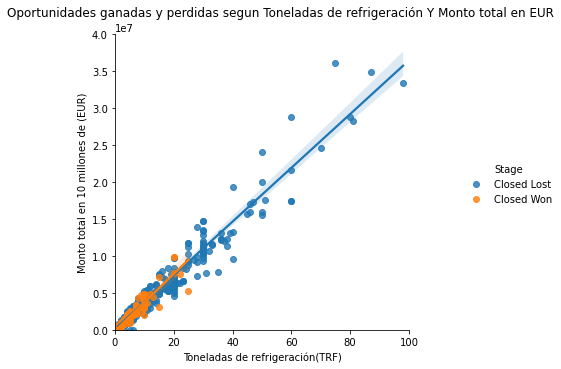

In [43]:
g = sns.lmplot(
    data=dfoc,
    x="TRF", y="Total_Amount", hue="Stage",
    height=5
)

g.set(xlim=(0, 100))
g.set(ylim=(0, 40000000))
fig = g.fig 
fig.suptitle('Oportunidades ganadas y perdidas segun Toneladas de refrigeración Y Monto total en EUR',fontsize=12,va='bottom')
g.set_axis_labels("Toneladas de refrigeración(TRF)", "Monto total en 10 millones de (EUR)")

Una tendencia similar se observa en las transacciones en Euros aunque en este caso los casos exitosos paran de ocurrir a partir de los 10 millones de euros y por encima de las 20 TRF, la misma correlacion que en el anterior caso da lugar en la que a mayor monto el TRF crece, aunque en este caso el TRF tanto de las oportunidades ganadas y de las oportunidades perdidas tienen un aumento mas similar.

In [95]:
casos_trf_0 = df.drop(df.index[df['TRF'] != 0])
casos_trf_0 = casos_trf_0.Stage.value_counts().to_frame(name = 'Casos_TRF_0')
casos_trf_no_0 = df.drop(df.index[df['TRF'] == 0])
casos_trf_no_0 = casos_trf_no_0.Stage.value_counts().to_frame(name = 'Casos_TRF_no_0')
lista_a_unir = [casos_trf_0,casos_trf_no_0]
casos_trf_cerrados =  pd.concat(lista_a_unir, join = 'outer', axis = 1).fillna(0)
casos_trf_cerrados

,Casos_TRF_0,Casos_TRF_no_0
Closed Won,6234,1296
Closed Lost,2500,3595


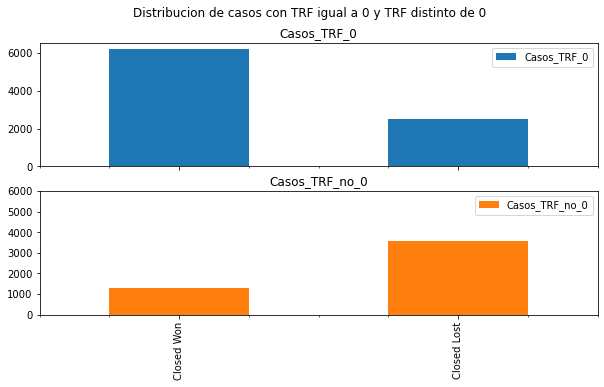

In [105]:
casos_trf_cerrados.plot.bar( subplots = True, figsize=(10, 5), title = 'Distribucion de casos con TRF igual a 0 y TRF distinto de 0')
plt.ylim(0,6000)
plt.show()

In [158]:
oportunidades_0 = df.drop(df.index[df['TRF'] != 0])
oportunidades_no_0 = df.drop(df.index[df['TRF'] == 0])
oportunidades_0 = oportunidades_0.Billing_Country.value_counts().to_frame(name = 'Casos_TRF_0')
oportunidades_no_0 = oportunidades_no_0.Billing_Country.value_counts().to_frame(name = 'Casos_TRF_no_0')
lista_a_unir = [oportunidades_0,oportunidades_no_0]
casos_trf_cerrados =  pd.concat(lista_a_unir, join = 'outer', axis = 1).fillna(0)
casos_trf_cerrados

,Casos_TRF_0,Casos_TRF_no_0
Japan,1904.0,203.0
United States,1474.0,1846.0
Germany,1008.0,966.0
Australia,982.0,182.0
Netherlands,423.0,140.0
...,...,...
Argentina,0.0,1.0
Malaysia,0.0,1.0
Chile,0.0,1.0
Colombia,0.0,1.0


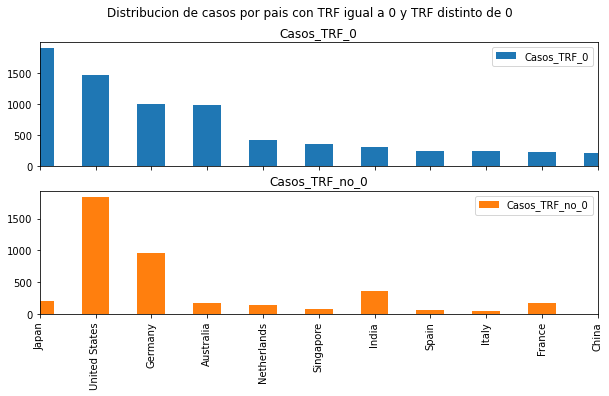

In [160]:
casos_trf_cerrados.plot.bar( subplots = True, figsize=(10, 5), title = 'Distribucion de casos por pais con TRF igual a 0 y TRF distinto de 0')

plt.xlim(0,10)
plt.show()

Podemos ver que paises como japon o australia tienen un porcentaje mucho mayor de casos en los que el TRF de las operaciones es igual a 0 mientras que el resto de paises tienen en general distribuciones mas igualadas o inclinadas ligeramente hacia uno u otro lado.